In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import collections

C:\Users\bhati\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#read the dataset
dataset = pd.read_csv('Crime_Data_from_2010_to_Present.csv')

In [4]:
age = dataset[['Victim Age']]

In [5]:
age_array = age.values
age = age_array.flatten()

In [6]:
#filter NAN values
age = age[~np.isnan(age)]

In [7]:
# setting the ranges and no. of intervals
range = (0, 100)
bins = 10 

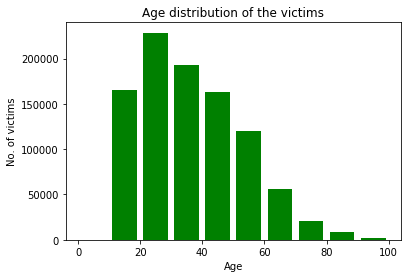

In [144]:
# x-axis label
plt.xlabel('Age')
# frequency label
plt.ylabel('No. of victims')
# plot title
plt.title('Age distribution of the victims')
# plotting a histogram
plt.hist(age, bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.8)
# function to show the plot
plt.savefig('Age dist')
plt.show()


In [9]:
race = dataset[['Victim Descent']]

In [10]:
race_array = race.values
race = race_array.flatten()

In [11]:
#filter NAN values
race = race[~pd.isnull(race)]

In [12]:
counter = collections.Counter(race)

In [13]:
labels = list(counter.keys())
slices = list(counter.values())

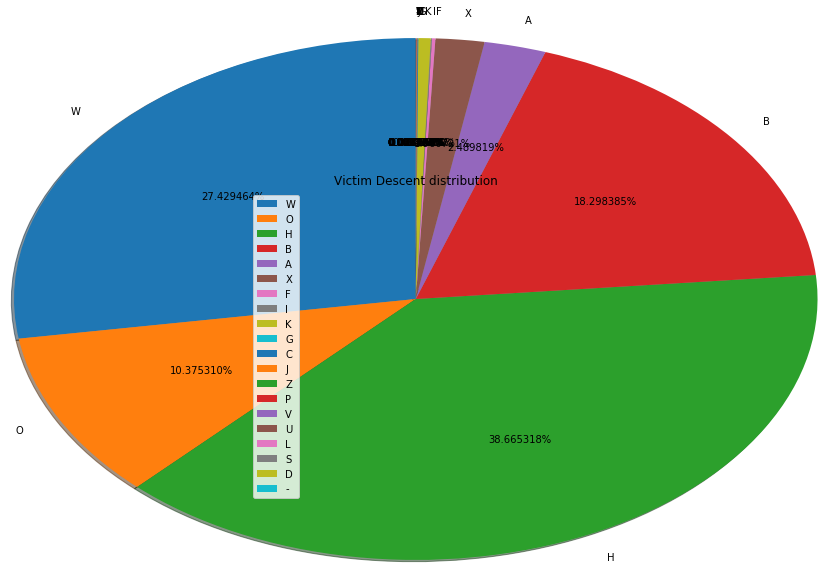

In [146]:
# plotting the pie chart
plt.pie(slices, labels = labels, startangle=90, shadow = True, 
        radius = 3, autopct = '%2f%%')

# plotting legend
plt.legend(loc = 'upper left')
plt.title('Victim Descent distribution')

plt.savefig('victim descent')
# showing the plot
plt.show()



In [61]:
df = pd.DataFrame(dataset, columns = ['Victim Age', 'Victim Sex'])

In [113]:
df = df[~df['Victim Age'].isnull() & ~df['Victim Sex'].isnull()]
df = df.loc[dataset['Victim Sex'].isin(['F','M'])]


fCount_1018 = (df[df['Victim Sex'].isin(['F']) & (df['Victim Age'] <=18)]).count().values[0]
fCount_1925 = (df[df['Victim Sex'].isin(['F']) & (df['Victim Age'] > 18) & (df['Victim Age'] <=25)]).count().values[0]
fCount_2635 = (df[df['Victim Sex'].isin(['F']) & (df['Victim Age'] > 25) & (df['Victim Age'] <=35)]).count().values[0]
fCount_3650 = (df[df['Victim Sex'].isin(['F']) & (df['Victim Age'] > 35) & (df['Victim Age'] <=50)]).count().values[0]
fCount_gt50 = (df[df['Victim Sex'].isin(['F']) & (df['Victim Age'] >=51)]).count().values[0]

mCount_1018 = (df[df['Victim Sex'].isin(['M']) & (df['Victim Age'] <=18)]).count().values[0]
mCount_1925 = (df[df['Victim Sex'].isin(['M']) & (df['Victim Age'] > 18) & (df['Victim Age'] <=25)]).count().values[0]
mCount_2635 = (df[df['Victim Sex'].isin(['M']) & (df['Victim Age'] > 25) & (df['Victim Age'] <=35)]).count().values[0]
mCount_3650 = (df[df['Victim Sex'].isin(['M']) & (df['Victim Age'] > 35) & (df['Victim Age'] <=50)]).count().values[0]
mCount_gt50 = (df[df['Victim Sex'].isin(['M']) & (df['Victim Age'] >=51)]).count().values[0]



In [114]:
maleCount = [mCount_1018, mCount_1925, mCount_2635, mCount_3650, mCount_gt50]
femaleCount = [fCount_1018, fCount_1925, fCount_2635, fCount_3650, fCount_gt50]


[34163, 86041, 112919, 120461, 89687]


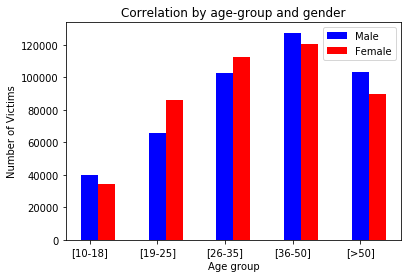

In [141]:
width = 0.25
ind = np.arange(5)

fig = plt.figure()
ax = fig.add_subplot(111)

r1 = ax.bar(ind,maleCount,width,color = 'b')
r2 = ax.bar(ind+width, femaleCount, width, color = 'r')

plt.xticks(ind, ('[10-18]', '[19-25]', '[26-35]', '[36-50]', '[>50]'))

plt.ylabel('Number of Victims')
plt.xlabel('Age group')
plt.title('Correlation by age-group and gender')
plt.legend((r1,r2), ('Male', 'Female'))

#plt.show()

plt.savefig('corr age-gender')

In [131]:
df2 = pd.DataFrame(dataset, columns = ['Victim Sex', 'Time Occurred'])

df2 = df2[~df2['Time Occurred'].isnull() & ~df['Victim Sex'].isnull()]
df2 = df2.loc[dataset['Victim Sex'].isin(['F','M'])]


In [135]:
fCount_6to12 = (df2[df2['Victim Sex'].isin(['F']) & (df2['Time Occurred'] >= 600) & (df2['Time Occurred'] <= 1159)]).count().values[0]
fCount_12to6pm = (df2[df2['Victim Sex'].isin(['F']) & (df2['Time Occurred'] >= 1200) & (df2['Time Occurred'] <= 1759)]).count().values[0]
fCount_6pmto12night = (df2[df2['Victim Sex'].isin(['F']) & (df2['Time Occurred'] >= 1800) & (df2['Time Occurred'] <= 2359)]).count().values[0]
fCount_12nightto6mor = (df2[df2['Victim Sex'].isin(['F']) & (df2['Time Occurred'] >= 1) & (df2['Time Occurred'] <= 559)]).count().values[0]

mCount_6to12 = (df2[df2['Victim Sex'].isin(['M']) & (df2['Time Occurred'] >= 600) & (df2['Time Occurred'] <= 1159)]).count().values[0]
mCount_12to6pm = (df2[df2['Victim Sex'].isin(['M']) & (df2['Time Occurred'] >= 1200) & (df2['Time Occurred'] <= 1759)]).count().values[0]
mCount_6pmto12night = (df2[df2['Victim Sex'].isin(['M']) & (df2['Time Occurred'] >= 1800) & (df2['Time Occurred'] <= 2359)]).count().values[0]
mCount_12nightto6mor = (df2[df2['Victim Sex'].isin(['M']) & (df2['Time Occurred'] >= 1) & (df2['Time Occurred'] <= 559)]).count().values[0]


In [136]:
mcount = [mCount_6to12,mCount_12to6pm , mCount_6pmto12night, mCount_12nightto6mor]
fcount = [fCount_6to12,fCount_12to6pm , fCount_6pmto12night, fCount_12nightto6mor]


[100255, 150974, 134653, 57389]


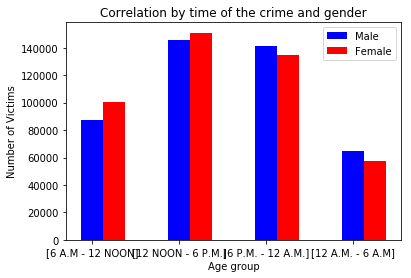

In [142]:
width = 0.25
ind = np.arange(4)

fig = plt.figure()
ax = fig.add_subplot(111)

r1 = ax.bar(ind,mcount,width,color = 'b')
r2 = ax.bar(ind+width, fcount, width, color = 'r')

plt.xticks(ind, ('[6 A.M - 12 NOON]', '[12 NOON - 6 P.M.]', '[6 P.M. - 12 A.M.]', '[12 A.M. - 6 A.M]'))

plt.ylabel('Number of Victims')
plt.xlabel('Age group')
plt.title('Correlation by time of the crime and gender')
plt.legend((r1,r2), ('Male', 'Female'))

plt.savefig('corr crime gender')